# Аналитик данных Нетология
Мной был пройден ознакомительный курс аналитики данных от платформы Нетология. В этом проекте сделан небольшой конспект основных операций, с которыми ознакомился на курсе.

## 1. Настройка рабочей среды

Здесь запросим доступ к гугл-диску и импортируем панду.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Открываем датасет.

In [2]:
sales = pd.read_csv('/content/drive/MyDrive/Учебное пособие/Программирование/Аналитика/sales_v2023-07-09.csv')
sales.head(10)

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00
5,85282012,2017-01-01,512,Аптека,Ставропольский край,266,1,0.03
6,86441447,2017-07-04,513,Спорт и отдых,Московская область,7129,3,0.00
7,3468527,2017-05-31,513,Аптека,Московская область,105,3,0.03
8,82105305,2017-03-30,513,Спорт и отдых,Московская область,18285,3,0.05
9,23201528,2017-04-22,513,Аптека,Московская область,1743,3,0.00


In [3]:
returns = pd.read_csv('/content/drive/MyDrive/Учебное пособие/Программирование/Аналитика/returns_v2023-07-09.csv')
returns.head(10)

,order_id,return
0,14186940,1
1,46863464,0
2,98992195,1
3,29193654,1
4,63339281,0
5,79463143,0
6,98709601,0
7,1613484,0
8,50948190,0
9,20172776,0


Посмотрим информацию по таблице.

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554192 entries, 0 to 1554191
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   order_id     1554192 non-null  int64  
 1   date         1554192 non-null  object 
 2   customer_id  1554192 non-null  int64  
 3   category     1554192 non-null  object 
 4   region       1554192 non-null  object 
 5   sales        1554192 non-null  int64  
 6   quantity     1554192 non-null  int64  
 7   discount     1554192 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.9+ MB


In [5]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639021 entries, 0 to 1639020
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   order_id  1639021 non-null  int64
 1   return    1639021 non-null  int64
dtypes: int64(2)
memory usage: 25.0 MB


## 2. Задача: определить регионы с большими продажами и наименьшими возвратами в категориях «Бытовая техника» и «Одежда и обувь».

Объединим таблицы из файлов sales.csv и returns.csv по общему столбцу order_id.

In [6]:
joined = sales.merge(returns, on='order_id')
joined.head(10)

,order_id,date,customer_id,category,region,sales,quantity,discount,return
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,0
1,96798611,2017-09-10,514,Продукты питания,Хабаровский край,2484,1,0.03,0
2,63656156,2017-02-20,528,Спорт и отдых,Ленинградская область,16743,2,0.10,0
3,64457545,2017-05-13,536,Спорт и отдых,Амурская область,9716,2,0.05,1
4,79445775,2017-02-21,543,Дача и сад,Амурская область,2577,3,0.00,0
5,71266861,2017-08-09,557,Дача и сад,Хабаровский край,1264,2,0.00,1
6,61188981,2017-07-23,558,Красота,Ленинградская область,1071,1,0.00,0
7,51348103,2017-05-29,561,Продукты питания,Амурская область,1941,3,0.00,0
8,82586210,2017-03-29,565,Продукты питания,Московская область,3888,1,0.00,0
9,28512571,2017-01-12,602,Спорт и отдых,Ленинградская область,8899,2,0.10,0


Посмотрим статистические характеристики для таблицы joined.

In [7]:
joined.describe()

,order_id,customer_id,sales,quantity,discount,return
count,2.587200e+04,25872.000000,25872.000000,25872.000000,25872.000000,25872.000000
mean,4.989540e+07,50328.168367,4095.662801,2.485931,0.029933,0.249072
std,2.898543e+07,28816.224677,4404.929850,1.036478,0.036491,0.432484
min,3.907000e+03,512.000000,0.000000,0.000000,0.000000,0.000000
25%,2.456323e+07,25139.750000,1118.000000,2.000000,0.000000,0.000000
50%,5.001541e+07,50137.000000,2533.000000,2.000000,0.000000,0.000000
75%,7.527873e+07,75132.250000,5255.250000,3.000000,0.050000,0.000000
max,9.999755e+07,100493.000000,31660.000000,7.000000,0.100000,1.000000


Определить диапазон дат:

In [8]:
max(joined['date']), min(joined['date'])

('2019-10-31', '2017-01-01')

Уникальные категории:

In [9]:
joined['category'].unique()

array(['Одежда и обувь', 'Продукты питания', 'Спорт и отдых',
       'Дача и сад', 'Красота', 'Бытовая техника', 'Аптека', 'Мебель'],
      dtype=object)

Распределение количества строк по категориям

In [10]:
joined['category'].value_counts(), joined['category'].value_counts(normalize=True)

(Продукты питания    6338
 Одежда и обувь      4851
 Спорт и отдых       4175
 Аптека              3632
 Дача и сад          3169
 Бытовая техника     2139
 Красота             1078
 Мебель               490
 Name: category, dtype: int64,
 Продукты питания    0.244975
 Одежда и обувь      0.187500
 Спорт и отдых       0.161371
 Аптека              0.140383
 Дача и сад          0.122488
 Бытовая техника     0.082676
 Красота             0.041667
 Мебель              0.018939
 Name: category, dtype: float64)

Несколько фильтров

In [11]:
joined[(joined['region']=='Ленинградская область') & (joined['sales'] < 500)].head()

,order_id,date,customer_id,category,region,sales,quantity,discount,return
112,37656604,2017-03-25,1893,Красота,Ленинградская область,417,2,0.03,0
133,68277306,2017-10-08,2198,Красота,Ленинградская область,406,2,0.10,0
297,72579869,2017-09-18,4068,Одежда и обувь,Ленинградская область,194,3,0.00,0
528,4089506,2017-09-16,6665,Продукты питания,Ленинградская область,224,2,0.05,0
539,60477143,2017-05-20,6736,Красота,Ленинградская область,327,1,0.00,0


Отфильтруем полученную таблицу по категориям «Бытовая техника» и «Одежда и обувь».

In [12]:
appliances = joined.query('category=="Бытовая техника"')
appliances.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,return
18,32348754,2017-06-12,748,Бытовая техника,Ленинградская область,7600,1,0.05,0
22,86378663,2017-06-22,783,Бытовая техника,Иркутская область,7832,1,0.00,0
33,47568832,2017-05-04,927,Бытовая техника,Ставропольский край,15692,4,0.00,0
34,56953597,2017-11-11,941,Бытовая техника,Приморский край,1277,2,0.05,0
39,28072544,2017-08-05,979,Бытовая техника,Московская область,7197,3,0.05,1


In [13]:
joined[joined['category']=="Одежда и обувь"].head()

,order_id,date,customer_id,category,region,sales,quantity,discount,return
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,0
12,49198325,2017-11-09,708,Одежда и обувь,Московская область,325,3,0.00,0
13,2870212,2018-04-01,710,Одежда и обувь,Красноярский край,825,3,0.03,0
16,3840410,2017-12-10,744,Одежда и обувь,Смоленская область,524,3,0.05,0
27,17845042,2018-01-06,846,Одежда и обувь,Иркутская область,1142,2,0.03,1


Фильтрация по нескольким категориям

In [14]:
dataset = joined[joined['category'].isin(['Бытовая техника', 'Одежда и обувь'])]
dataset.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,return
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,0
12,49198325,2017-11-09,708,Одежда и обувь,Московская область,325,3,0.00,0
13,2870212,2018-04-01,710,Одежда и обувь,Красноярский край,825,3,0.03,0
16,3840410,2017-12-10,744,Одежда и обувь,Смоленская область,524,3,0.05,0
18,32348754,2017-06-12,748,Бытовая техника,Ленинградская область,7600,1,0.05,0


In [15]:
joined[joined['category'].isin(['Бытовая техника', 'Одежда и обувь'])][joined['region'].isin(['Смоленская область', 'Ставропольский край'])]


<ipython-input-15-4bdaeafb1e95>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  joined[joined['category'].isin(['Бытовая техника', 'Одежда и обувь'])][joined['region'].isin(['Смоленская область', 'Ставропольский край'])]


,order_id,date,customer_id,category,region,sales,quantity,discount,return
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,0
16,3840410,2017-12-10,744,Одежда и обувь,Смоленская область,524,3,0.05,0
33,47568832,2017-05-04,927,Бытовая техника,Ставропольский край,15692,4,0.00,0
45,49506400,2017-09-18,1041,Одежда и обувь,Ставропольский край,1551,2,0.03,1
61,22411851,2017-04-09,1264,Бытовая техника,Ставропольский край,2739,1,0.10,1
...,...,...,...,...,...,...,...,...,...
25738,2153445,2019-08-27,98756,Одежда и обувь,Ставропольский край,282,4,0.00,0
25772,87428829,2019-08-16,99213,Одежда и обувь,Ставропольский край,3791,2,0.00,0
25795,94752493,2018-12-20,99430,Бытовая техника,Смоленская область,832,3,0.05,0
25865,8610952,2019-07-29,100421,Одежда и обувь,Смоленская область,699,1,0.00,0


Посчитаем, в каком регионе были наибольшие продажи.

In [16]:
#группировка по регионам с убыванием суммы продаж
rich_region = dataset.groupby('region').agg({'sales':'sum'}).sort_values('sales', ascending=False)
#возрастание ascending=True
rich_region

,sales
region,
Московская область,3943161
Амурская область,3730662
Ленинградская область,3333865
Хабаровский край,3322660
Иркутская область,2457319
Приморский край,2324665
Краснодарский край,2235671
Ставропольский край,1979851
Владимирская область,1839444


In [17]:
#регион с самыми большими продажами
rich_region[rich_region['sales']==max(rich_region['sales'])]

,sales
region,
Московская область,3943161


Посчитаем долю возвратов товаров для каждого региона.

In [18]:
#создадим сводную таблицу

pivot_data = dataset.pivot_table(index='region', columns='return', values='sales', aggfunc='count')
pivot_data

return,0,1
region,,
Амурская область,693,247
Владимирская область,339,104
Иркутская область,427,146
Краснодарский край,433,121
Красноярский край,301,91
Ленинградская область,626,192
Московская область,730,254
Приморский край,431,163
Смоленская область,319,96


Добавим в сводную таблицу столбец

In [19]:
pivot_data['return_share'] = pivot_data[1] / (pivot_data[0] + pivot_data[1])
pivot_data

return,0,1,return_share
region,,,
Амурская область,693,247,0.262766
Владимирская область,339,104,0.234763
Иркутская область,427,146,0.254799
Краснодарский край,433,121,0.218412
Красноярский край,301,91,0.232143
Ленинградская область,626,192,0.234719
Московская область,730,254,0.258130
Приморский край,431,163,0.274411
Смоленская область,319,96,0.231325


## 3. Основные операции по очистке данных в датасете.

Тестовый дата-фрейм.

In [20]:
data = pd.DataFrame({
    'text': ['Посёлок московский', "посёлок Московский", "пос. Московский", "п. Московский", "Московский"]
})
data

,text
0,Посёлок московский
1,посёлок Московский
2,пос. Московский
3,п. Московский
4,Московский


In [21]:
#привести к нижнему регистру
data['text'] = data['text'].str.lower()
data

,text
0,посёлок московский
1,посёлок московский
2,пос. московский
3,п. московский
4,московский


In [22]:
#удалить слово "посёлок"
data['text'] = data['text'].str.replace('посёлок', '')
data

,text
0,московский
1,московский
2,пос. московский
3,п. московский
4,московский


In [23]:
#заменить все предложенные слова на пустую строку (удаление)
#regex=True - включение режима регулярных выражений, по умолчанию True
data['text'] = data['text'].str.replace('(посёлок |пос. |п. )', '', regex=True)
data

,text
0,московский
1,московский
2,московский
3,московский
4,московский


Определение дубликатов строк.

In [24]:
data = pd.DataFrame(
    {
        'date': ['2023-01-01', '2021-01-02', '2023-01-01', '2023-01-02', '2023-01-01'],
        'city': ['St.Peterburg','Novosibirsk','St.Peterburg','Moskow','St.Peterburg'],
        'cost': [20, 15, 20, 8,14],
    }
)

data

,date,city,cost
0,2023-01-01,St.Peterburg,20
1,2021-01-02,Novosibirsk,15
2,2023-01-01,St.Peterburg,20
3,2023-01-02,Moskow,8
4,2023-01-01,St.Peterburg,14


In [25]:
#дубликаты
print(data.duplicated())
print(data.duplicated(['date']))
print(data.duplicated(['date', 'city']))

0    False
1    False
2     True
3    False
4    False
dtype: bool
0    False
1    False
2     True
3    False
4     True
dtype: bool
0    False
1    False
2     True
3    False
4     True
dtype: bool


In [26]:
data.drop_duplicates()

,date,city,cost
0,2023-01-01,St.Peterburg,20
1,2021-01-02,Novosibirsk,15
3,2023-01-02,Moskow,8
4,2023-01-01,St.Peterburg,14


In [27]:
#удалить дубликаты и перезаписать таблицу inplace=True
data.drop_duplicates(['date'], inplace=True)
data

,date,city,cost
0,2023-01-01,St.Peterburg,20
1,2021-01-02,Novosibirsk,15
3,2023-01-02,Moskow,8


In [28]:
#кванитили
q_5, q_95 = sales['sales'].quantile(0.05),  sales['sales'].quantile(0.95)
q_5, q_95

(225.0, 13842.449999999953)

## 4. Визуализация данных в виде гистограмм

Фильтрация данных в пределах квартилей.

In [29]:
data_filtered = sales[(sales['sales'] >= q_5) & (sales['sales'] <= q_95)]
data_filtered.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


(<Axes: >, <Axes: >)

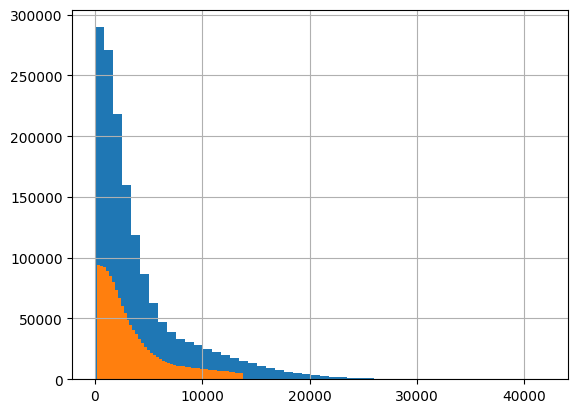

In [30]:
sales['sales'].hist(bins=50), data_filtered['sales'].hist(bins=50)

In [31]:
#частота встречаемости в датасете
sales['category'].value_counts(normalize=True)

Продукты питания    0.245975
Одежда и обувь      0.187210
Спорт и отдых       0.164190
Аптека              0.139978
Дача и сад          0.120791
Бытовая техника     0.081878
Красота             0.041163
Мебель              0.018814
Name: category, dtype: float64

In [32]:
#строчки с нулевыми данными
null_rows = sales[pd.isnull(sales['sales'])]
null_rows

,order_id,date,customer_id,category,region,sales,quantity,discount


In [33]:
df_1 = sales[['sales', 'quantity']]
df_1.corr() #корреляция между столбцами

,sales,quantity
sales,1.000000,-0.000175
quantity,-0.000175,1.000000


In [34]:
len(sales[sales.duplicated()]) #количество строк-дубликатов

0

<Axes: >

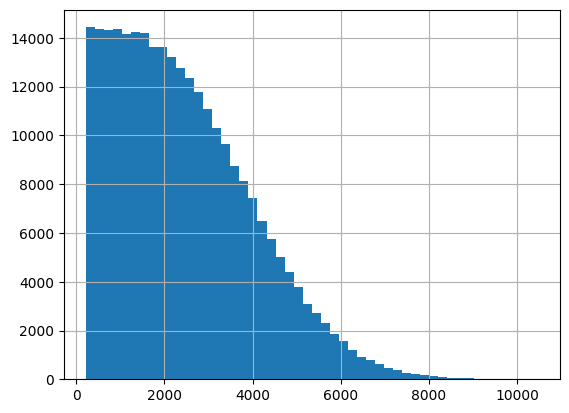

In [35]:
clother = sales[sales['category']=="Одежда и обувь"]
clother = clother[clother['sales'].between(q_5, q_95)]
clother['sales'].hist(bins=50)

In [36]:
sales_no_null = sales[~pd.isnull(sales['sales'])]
sales_no_null.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


<Axes: xlabel='region'>

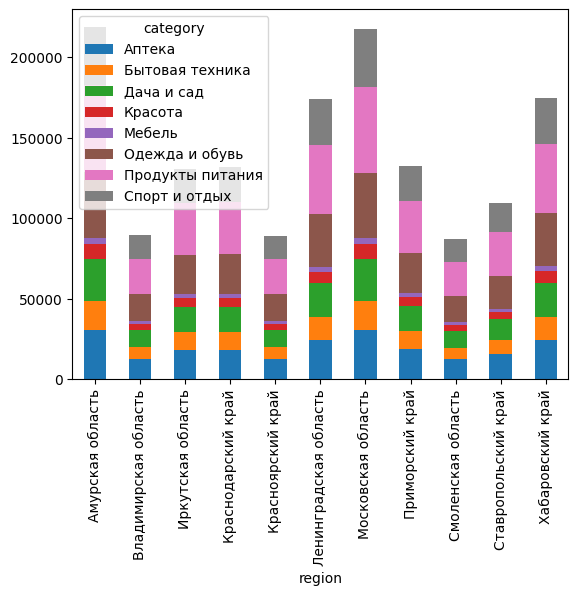

In [37]:
sales.groupby(['region', 'category']).size().unstack().plot(kind='bar', stacked=True)

## 5. Сводная таблица с agg функцией

In [38]:
sales['category'].nunique()

8

In [39]:
sales_region = sales.groupby(['region', 'date']).agg({'sales':'sum'})
sales_region

sales
region           date              
Амурская область 2017-01-01  722233
                 2017-01-02  324471
                 2017-01-03  363335
                 2017-01-04  437015
                 2017-01-05  341023
...                             ...
Хабаровский край 2019-10-27  375306
                 2019-10-28  476759
                 2019-10-29  487345
                 2019-10-30  409963
                 2019-10-31  384660

[11374 rows x 1 columns]

In [40]:
sales.groupby(['region', 'date']).agg({'sales':'sum'})

sales
region           date              
Амурская область 2017-01-01  722233
                 2017-01-02  324471
                 2017-01-03  363335
                 2017-01-04  437015
                 2017-01-05  341023
...                             ...
Хабаровский край 2019-10-27  375306
                 2019-10-28  476759
                 2019-10-29  487345
                 2019-10-30  409963
                 2019-10-31  384660

[11374 rows x 1 columns]

## 6. Визуализация с помощью библиотеки matplotlib

<Axes: >

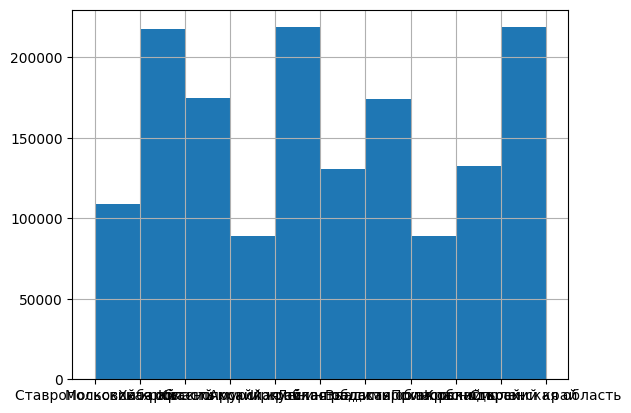

In [41]:
sales['region'].hist()

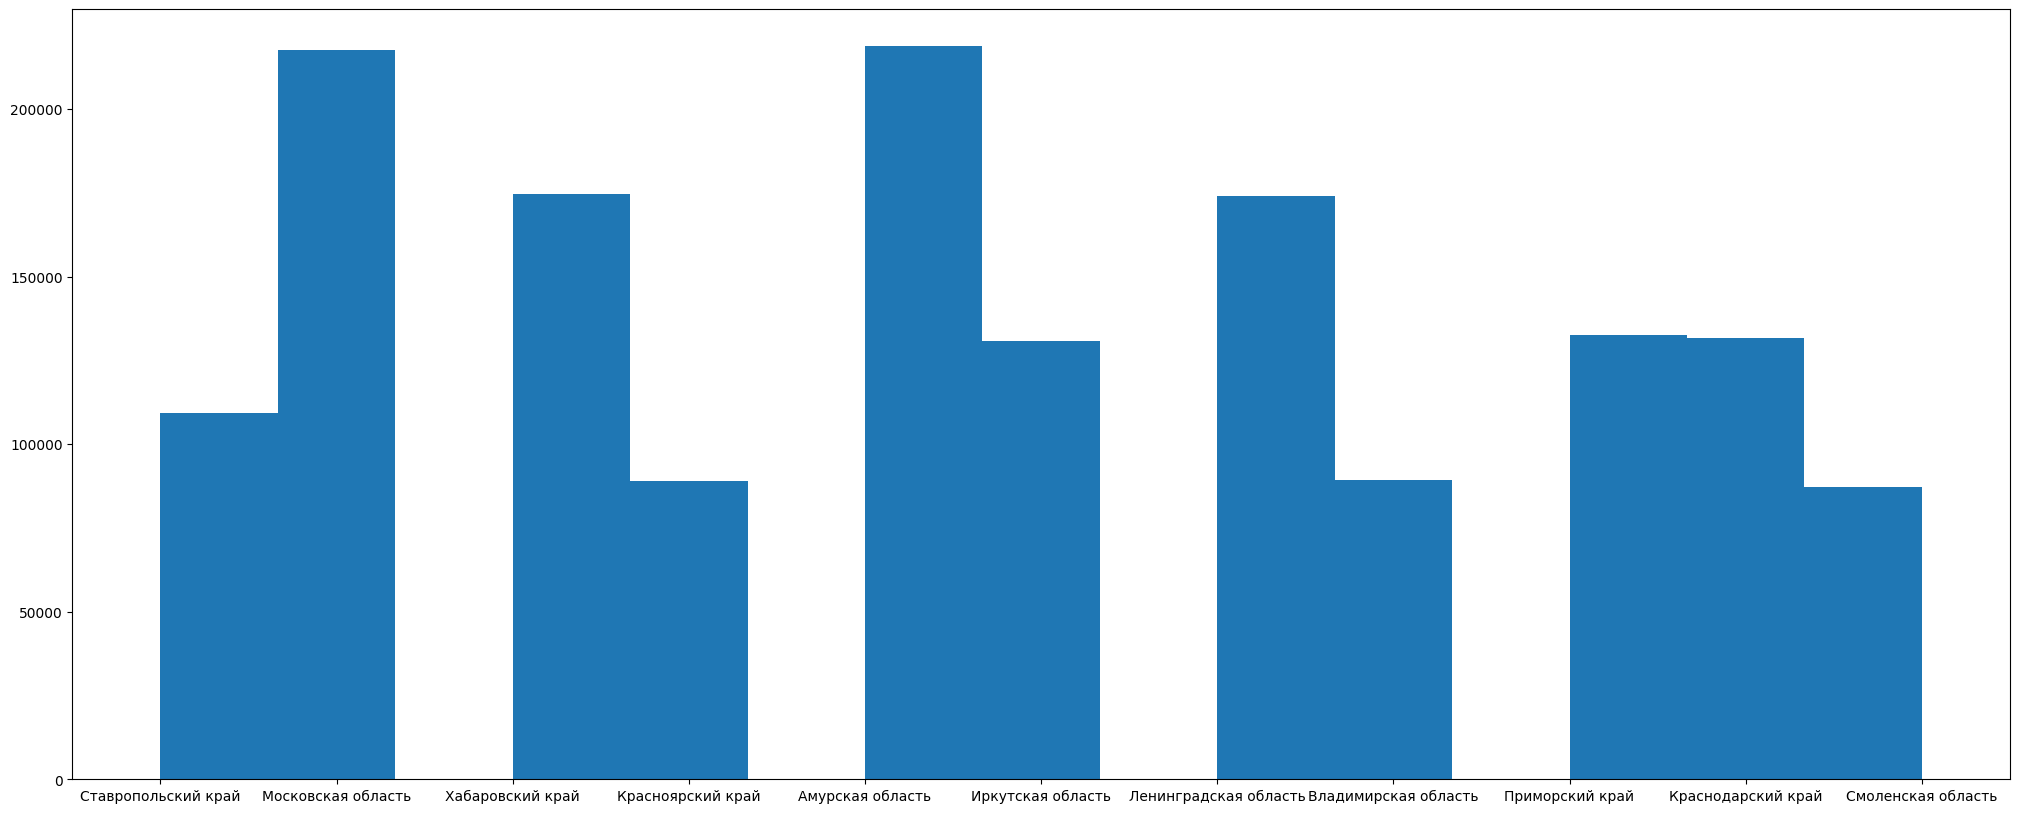

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.hist(sales['region'], bins=15)
plt.show()

In [43]:
sales.groupby(['region', 'category']).size().unstack()

category,Аптека,Бытовая техника,Дача и сад,Красота,Мебель,Одежда и обувь,Продукты питания,Спорт и отдых
region,,,,,,,,
Амурская область,30616,17793,26484,8829,4138,41029,53952,36001
Владимирская область,12490,7428,10666,3643,1721,16800,21851,14652
Иркутская область,18264,10783,15701,5429,2481,24695,31969,21338
Краснодарский край,18277,10814,15957,5459,2523,24713,32346,21518
Красноярский край,12487,7290,10707,3623,1746,16665,21916,14520
Ленинградская область,24164,14162,21161,7283,3148,32440,42844,28731
Московская область,30549,17774,26363,9038,3975,40560,53573,35664
Приморский край,18719,10971,15969,5393,2462,24576,32507,21893
Смоленская область,12221,7085,10615,3640,1653,16322,21305,14314


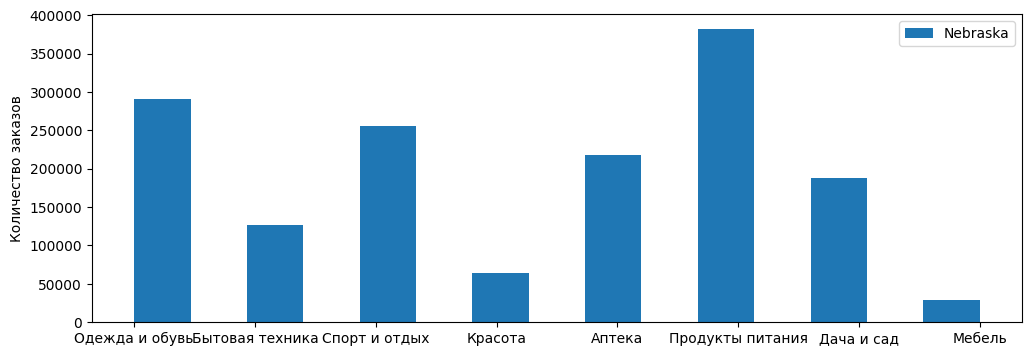

In [44]:
plt.figure(figsize=(12, 4))

values, bins, bars = plt.hist(sales['category'], bins=15, label='Nebraska')

plt.ylabel('Количество заказов')
plt.legend()

<Axes: xlabel='region'>

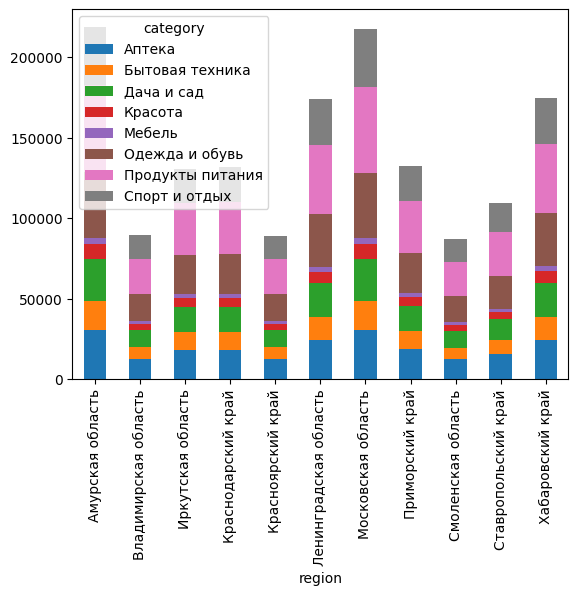

In [45]:
sales.groupby(['region', 'category']).size().unstack().plot(kind='bar',stacked=True)

Создаём столбец, где в дате присутствует год и месяц.

In [46]:
sales['mounth'] = pd.to_datetime(sales['date']).dt.month
sales['mounth_'] = sales['date'].str.slice(start=0, stop=7)
sales['mounth_'].head()

0    2017-10
1    2017-07
2    2017-07
3    2017-02
4    2017-09
Name: mounth_, dtype: object

<Axes: xlabel='mounth_'>

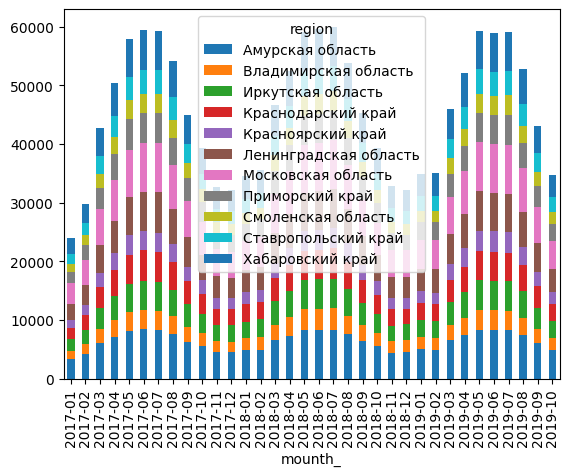

In [47]:
sales.groupby(['mounth_','region']).size().unstack().plot(kind='bar',stacked=True)

<Axes: xlabel='mounth_'>

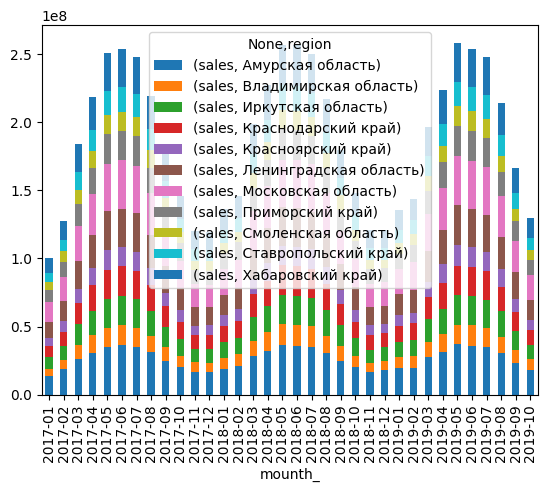

In [48]:
sales.groupby(['mounth_','region']).agg({'sales':'sum'}).unstack().plot(kind='bar',stacked=True)

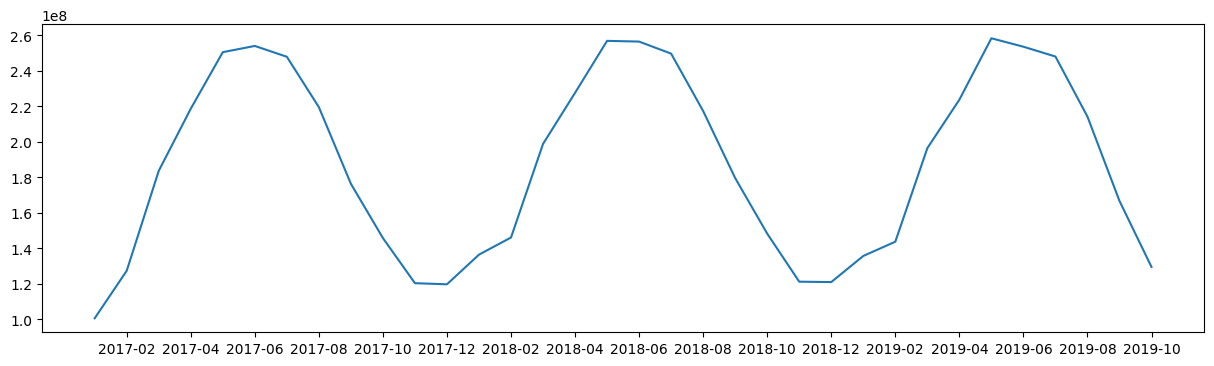

In [49]:
sales_by_month = sales.groupby(['mounth_', 'category', 'region']).agg({'sales': 'sum'}).reset_index()
sales_by_month.head()
sales_graph = sales_by_month.groupby(['mounth_']).agg({'sales': 'sum'}).reset_index()
sales_graph.head()

plt.figure(figsize=(15, 4))

plt.plot(sales_graph['mounth_'], sales_graph['sales'])
plt.xticks(plt.xticks()[0][1::2])
plt.show()

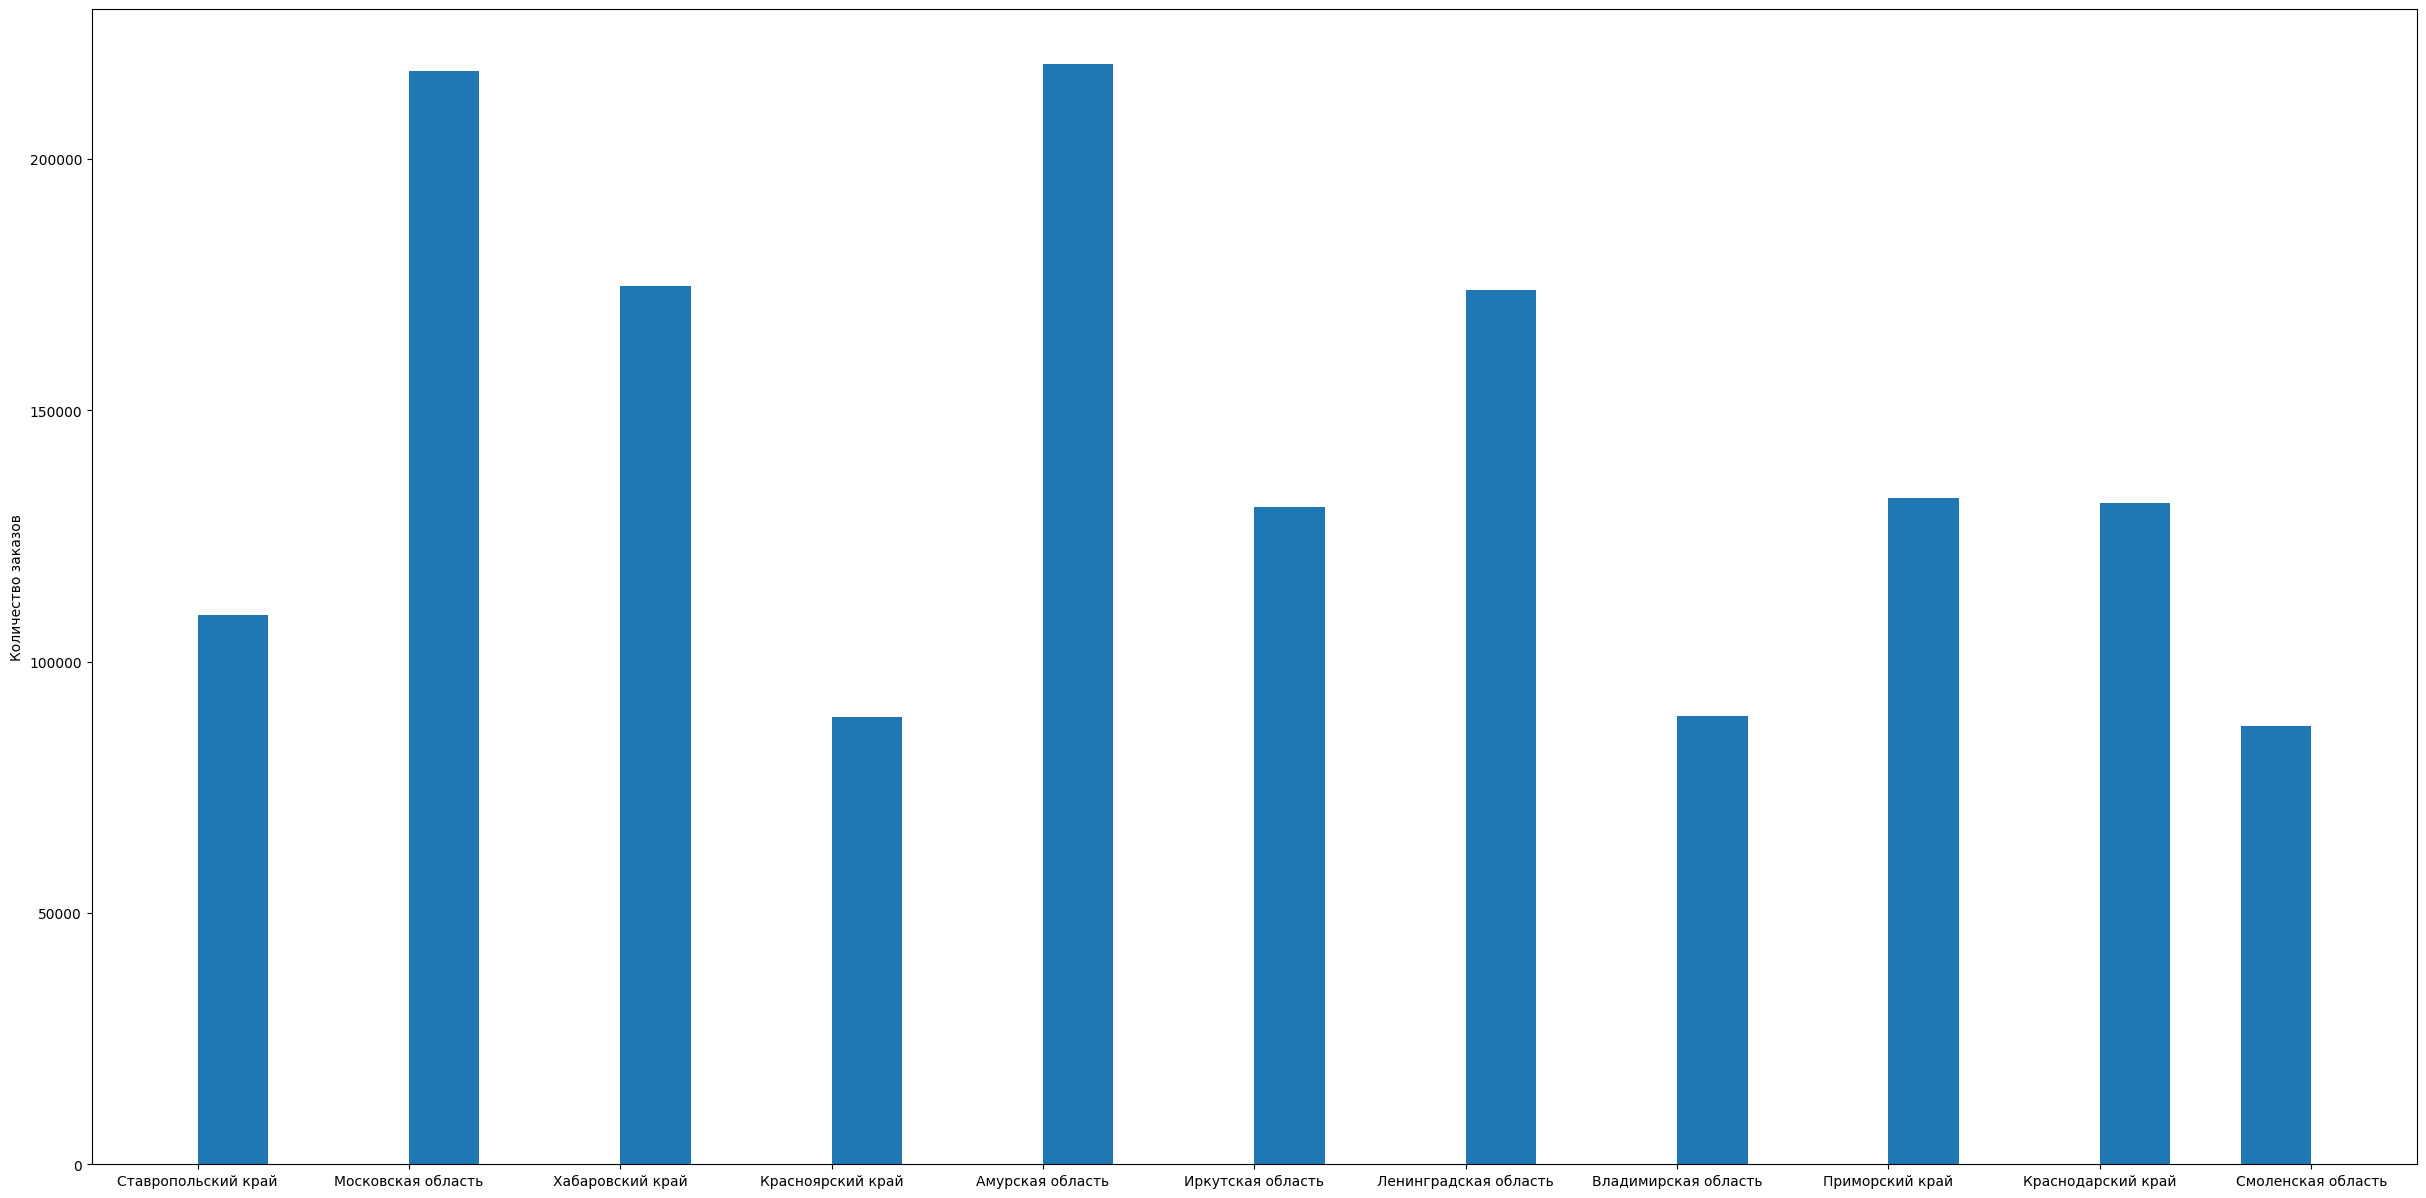

In [50]:
plt.figure(figsize=(30, 15))
values, bins, bars = plt.hist(sales['region'], bins=30)
plt.ylabel('Количество заказов')
plt.show()

## 7. Визуализация с помощью библиотеки plotly

In [51]:
import plotly.express as px

sales_region = sales_by_month.groupby(['mounth_', 'region'], as_index=False).sum()

fig = px.line(sales_region, x='mounth_', y='sales', color='region')

fig.update_layout(
    updatemenus=[
        {
            "buttons": [{ "label": 'Все регионы', "method": "restyle", "args": [{"visible": [True for _ in fig.data]}], }] +
            [
                {
                    "label": t.name,
                    "method": "restyle",
                    "args": [{"visible": [t2.name == t.name for t2 in fig.data]}],
                }
                for t in fig.data
            ]
        }
    ]
)

fig.show()

<ipython-input-51-c32812913343>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_region = sales_by_month.groupby(['mounth_', 'region'], as_index=False).sum()


In [53]:
import seaborn as sns

saler = sales.groupby(['order_id', 'discount']).agg({'sales': 'sum'}).reset_index()

saler.head()

,order_id,discount,sales
0,77,0.05,3164
1,101,0.05,112
2,151,0.05,5675
3,166,0.10,10828
4,174,0.00,1738
